In [1]:
from enum import Enum, auto
import random
import matplotlib.pyplot as plt

NUM_SIMULATIONS = 1000
NUM_ROUNDS = 1000
STARTING_MONI = 1000

In [2]:
class Colors(Enum):
    RED = auto()
    BLACK = auto()
    GREEN = auto()


class BettingStrategy(Enum):
    CONSTANT_RED_BLACK = auto()
    DOUBLING_RED_BLACK = auto()
    CONSTANT_GREEN = auto()
    RANDOM_BETTING = auto()


def constant_red_black(moni: int, rolls: list[Colors]) -> int:
    for roll in rolls:
        if moni < 10:
            return moni
        moni -= 10
        if roll == Colors.RED:
            moni += 20
    return moni


def doubling_red_black(moni: int, rolls: list[Colors]) -> int:
    bet = 10
    for roll in rolls:
        if moni < bet:
            bet = moni
        moni -= bet
        if roll == Colors.RED:
            moni += 2 * bet
            bet = 10
        else:
            bet *= 2
    return moni


def constant_green(moni: int, rolls: list[Colors]) -> int:
    for roll in rolls:
        if moni < 10:
            return moni
        moni -= 10
        if roll == Colors.GREEN:
            moni += 180
    return moni


def random_betting(moni: int, rolls: list[Colors]) -> int:
    for roll in rolls:
        if moni < 10:
            return moni
        moni -= 10
        if roll == random.choice([Colors.RED, Colors.BLACK, Colors.GREEN]):
            if roll == Colors.GREEN:
                moni += 180
            else:
                moni += 20
    return moni


def simulate(x: int, betting_strategy: BettingStrategy) -> None:
    moni = STARTING_MONI

    rolls = random.choices(
        population=[Colors.RED, Colors.BLACK, Colors.GREEN],
        weights=[x / 100, x / 100, (100 - 2 * x) / 100],
        k=NUM_ROUNDS,
    )

    match betting_strategy:
        case BettingStrategy.CONSTANT_RED_BLACK:
            moni = constant_red_black(moni, rolls)
        case BettingStrategy.DOUBLING_RED_BLACK:
            moni = doubling_red_black(moni, rolls)
        case BettingStrategy.CONSTANT_GREEN:
            moni = constant_green(moni, rolls)
        case BettingStrategy.RANDOM_BETTING:
            moni = random_betting(moni, rolls)
    return moni

returns = lambda x : [(v - STARTING_MONI) for v in x]
avg = lambda x : sum(x)/len(x)


In [3]:
constant_red_black_vals = []
doubling_red_black_vals = []
constant_green_vals = []
random_betting_vals = []

constant_red_black_ruin = []
doubling_red_black_ruin = []
constant_green_ruin = []
random_betting_ruin = []



for x in range(1, 50):
    print(x, end=" ")
    constant_red_black_simulations = [simulate(x, BettingStrategy.CONSTANT_RED_BLACK) for _ in range(NUM_SIMULATIONS)]
    constant_red_black_vals.append(avg(constant_red_black_simulations))
    constant_red_black_ruin.append(100*constant_red_black_simulations.count(0)/NUM_SIMULATIONS)

    doubling_red_black_simulations = [simulate(x, BettingStrategy.DOUBLING_RED_BLACK) for _ in range(NUM_SIMULATIONS)]
    doubling_red_black_vals.append(avg(doubling_red_black_simulations))
    doubling_red_black_ruin.append(100*doubling_red_black_simulations.count(0)/NUM_SIMULATIONS)

    constant_green_simulations = [simulate(x, BettingStrategy.CONSTANT_GREEN) for _ in range(NUM_SIMULATIONS)]
    constant_green_vals.append(avg(constant_green_simulations))
    constant_green_ruin.append(100*constant_green_simulations.count(0)/NUM_SIMULATIONS)

    random_betting_simulations = [simulate(x, BettingStrategy.RANDOM_BETTING) for _ in range(NUM_SIMULATIONS)]
    random_betting_vals.append(avg(random_betting_simulations))
    random_betting_ruin.append(100*random_betting_simulations.count(0)/NUM_SIMULATIONS)
    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [4]:
def plot(a: list[int], b: list[float]) -> None:
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 50), returns(a))
    plt.title('Expected Return vs x')
    plt.xlabel('x')
    plt.ylabel('Expected Return')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 50), b)
    plt.title('Risk of Ruin vs x')
    plt.xlabel('x')
    plt.ylabel('Risk of Ruin')
    
    plt.tight_layout()
    plt.show()

CONSTANT RED BLACK


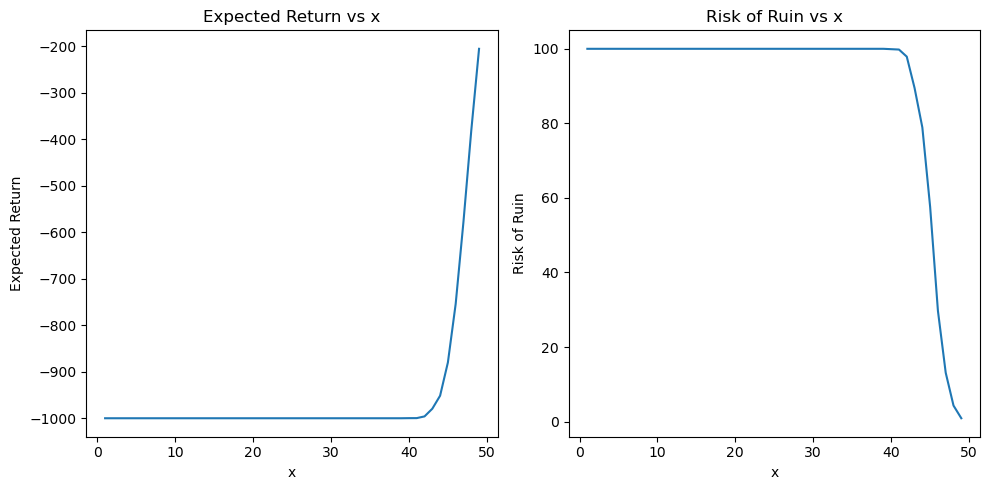

In [5]:
print("CONSTANT RED BLACK")
plot(constant_red_black_vals, constant_red_black_ruin)

DOUBLING RED BLACK


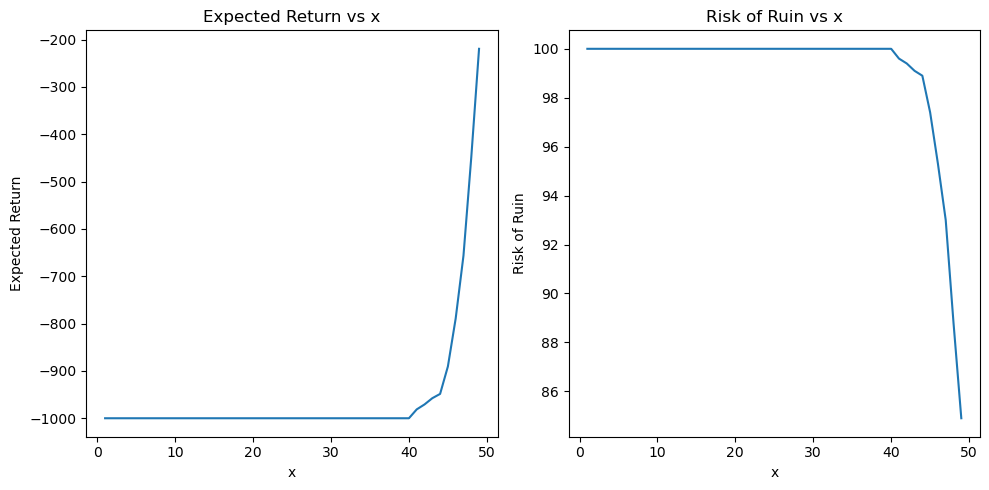

In [6]:
print("DOUBLING RED BLACK")
plot(doubling_red_black_vals, doubling_red_black_ruin)

CONSTANT GREEN


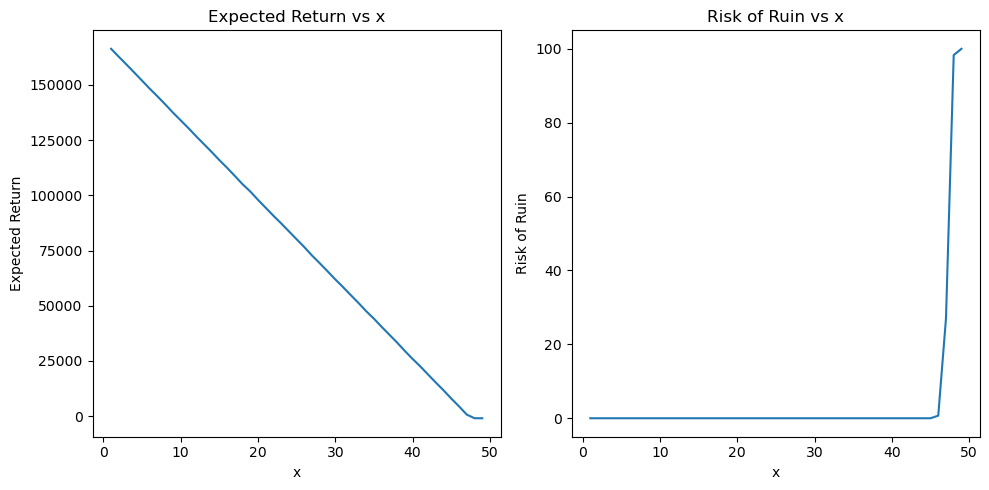

In [7]:
print("CONSTANT GREEN")
plot(constant_green_vals, constant_green_ruin)

RANDOM BETTING


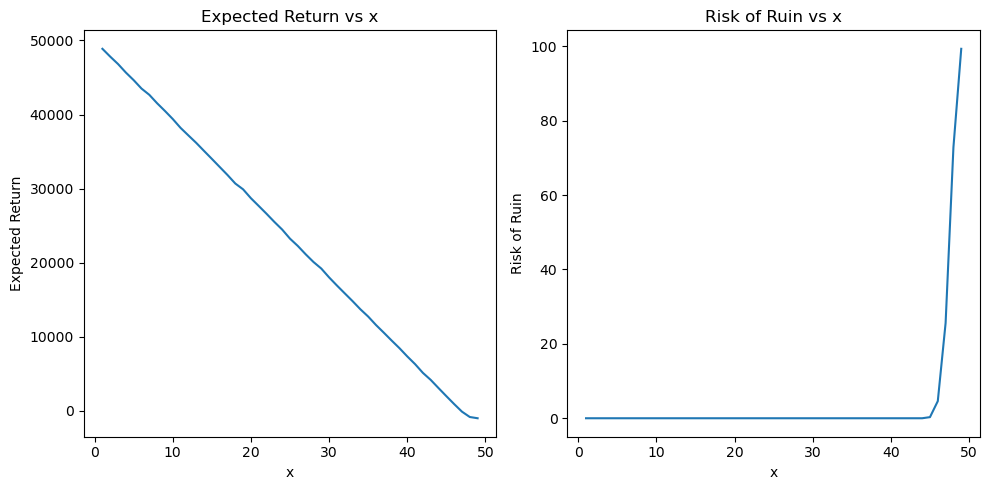

In [8]:
print("RANDOM BETTING")
plot(random_betting_vals, random_betting_ruin)

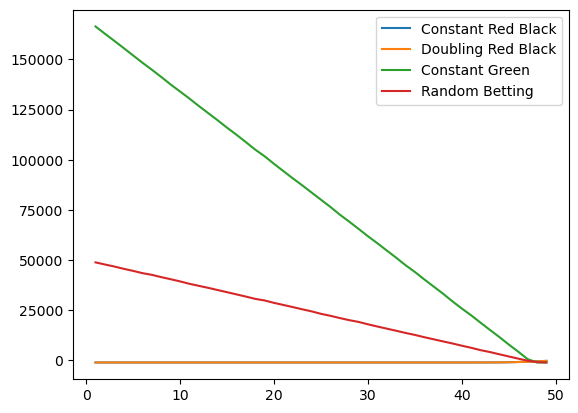

In [9]:
plt.plot(range(1, 50), returns(constant_red_black_vals), label="Constant Red Black")
plt.plot(range(1, 50), returns(doubling_red_black_vals), label="Doubling Red Black")
plt.plot(range(1, 50), returns(constant_green_vals), label="Constant Green")
plt.plot(range(1, 50), returns(random_betting_vals), label="Random Betting")
plt.legend()
plt.show()

# Analysis
## Strategy 1: Constant Red/Black
The expected return of this strategy is always negative. The risk of ruin is 100% for all x less than 40. This is because the probability of winning the roll in this case is just x, and the return is only the same amount being bet. This is not the optimal strategy.
## Strategy 2: Doubling Red/Black
This strategy performs almost identically as the first one, except for minor fluctuations around the x = 42 mark. Again, this is not the optimal strategy.
## Strategy 3: Constant Green
This strategy leads to returns of the order of $10^5$ for small x, and returns of the order of $10^4$ for large x. This is because the returns for winning a bet on green are very high (18 times) as compared to winning a bet on red/black. Due to each round consisting of a large number of rolls, and enough of a starting buffer, the risk of ruin is almost zero throughout. At very high x values, the probability of landing on a green is so low that it outweighs the gains to be made, and thus the risk of ruin is non-zero. This is the best strategy.
## Strategy 4: Random Betting
This strategy leads to returns of the order of $10^4$, while diminishing for large x. Since the chance of picking the colors is equal in this case, and we know that picking green always is the optimal strategy, this strategy performs better than constant red/black but worse than constant green.The risk of ruin is similar to that of strategy 3. This is the second best strategy.